### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



### Explaining Value iteration
Value Iteration works by trying to find the optimal vaue function; once it is found, finding the optimal policy becomes easier.

<br/>

#### How we find the optimal value function
Value iteration using the bellman optimality equation

$$V_{*}(s) = \max_{a \, \epsilon \, A} R_{s}^{\, a} + \gamma \sum _{s'\, \epsilon \: S} P_{ss'}^{a}V_{*}(s')$$

By applying this equation iteratively, the value function converges to the optimal value function.

<br/>

#### How do we find the optimal policy using the optimal value function
Using a simple greedy algorithm; we look at all possible actions and choose the one the will maximize the value function. Since the value function is optimal, our policy will be optimal.

In [2]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
        theta: The accuracy needed before stopping to improve the optimal value function
        discount_factor: The discount factor (gamma) used in the MDP
    """
    nA = 100
    nS = 101
    
    def P(s,s_prime,a):
        if a>s:
            return 0
        if s_prime == s-a:
            return (1-p_h)
        elif s_prime == s+a:
            return p_h
        else:
            return 0
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(nA)
        stakes = np.arange(1,min(s,100-s)+1)
        for a in stakes:
            A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h)*(rewards[s-a] + V[s-a]*discount_factor)
        return A
    
    
    
    V = np.zeros(nS)
    policy = np.zeros(nS)
    rewards = np.zeros(nS)
    rewards[100] = 1
    
    # Finding the optimal value function using vaue iteration
    while True:
        diff = 0
        for s in range(1,nS):
            best_action_value = np.max(one_step_lookahead(s,V,rewards))
            diff = max(diff,np.abs(best_action_value-V[s]))
            V[s] = best_action_value
        
        if diff<theta:
            break
    
    # Finding the optimal policy using the optimal value function
    for s in range(1,nS):
        best_action = np.argmax(one_step_lookahead(s,V,rewards))
        policy[s] = best_action
    
    return policy, V

In [3]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372

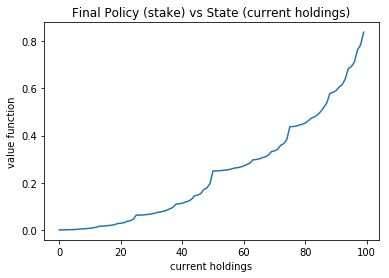

In [4]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('current holdings')
# naming the y axis
plt.ylabel('value function')
 
# giving a title to the graph
plt.title('Final Policy (stake) vs State (current holdings)')
 
# function to show the plot
plt.show()